<a href="https://colab.research.google.com/github/WinterSky13/Heart_failure_pred/blob/main/Heart_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score,confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve,classification_report
from pandas.plotting import scatter_matrix

In [6]:
heart_data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')


In [7]:
print(heart_data.shape)

(299, 13)


In [8]:
print(heart_data.head(10))

    age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1
5  90.0        1                        47  ...        1     8            1
6  75.0        1                       246  ...        0    10            1
7  60.0        1                       315  ...        1    10            1
8  65.0        0                       157  ...        0    10            1
9  80.0        1                       123  ...        1    10            1

[10 rows x 13 columns]


In [9]:
print(heart_data.describe())


              age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]


In [10]:
print(heart_data.tail(10))

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
289  90.0        1                       337  ...        0   256            0
290  45.0        0                       615  ...        0   257            0
291  60.0        0                       320  ...        0   258            0
292  52.0        0                       190  ...        1   258            0
293  63.0        1                       103  ...        1   270            0
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[10 rows x 13 columns]


In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


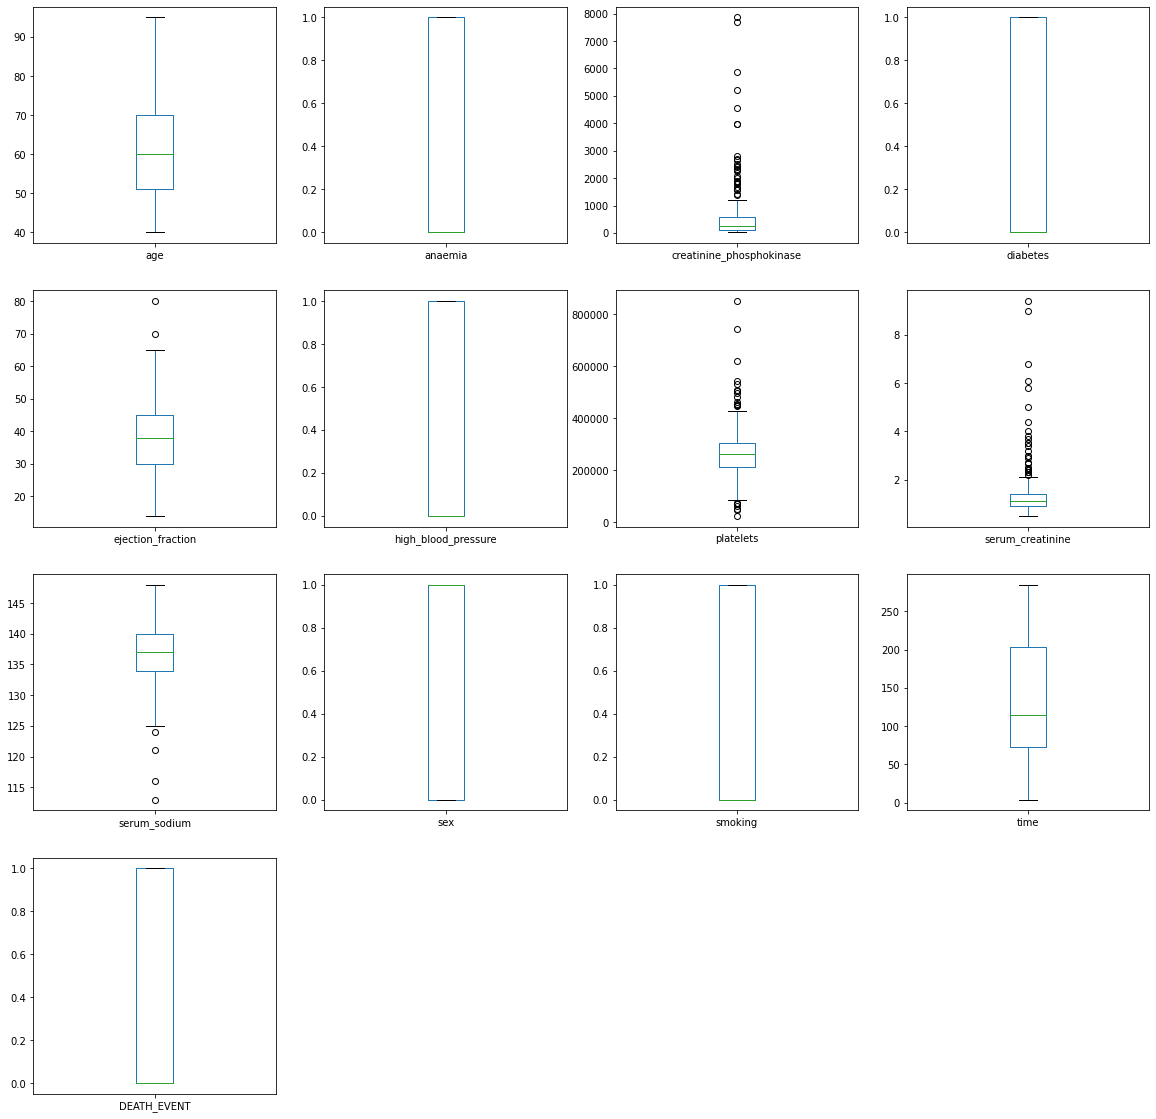

In [13]:
fig = plt.figure(figsize=(20, 20))
heart_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False,
ax = fig.gca())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


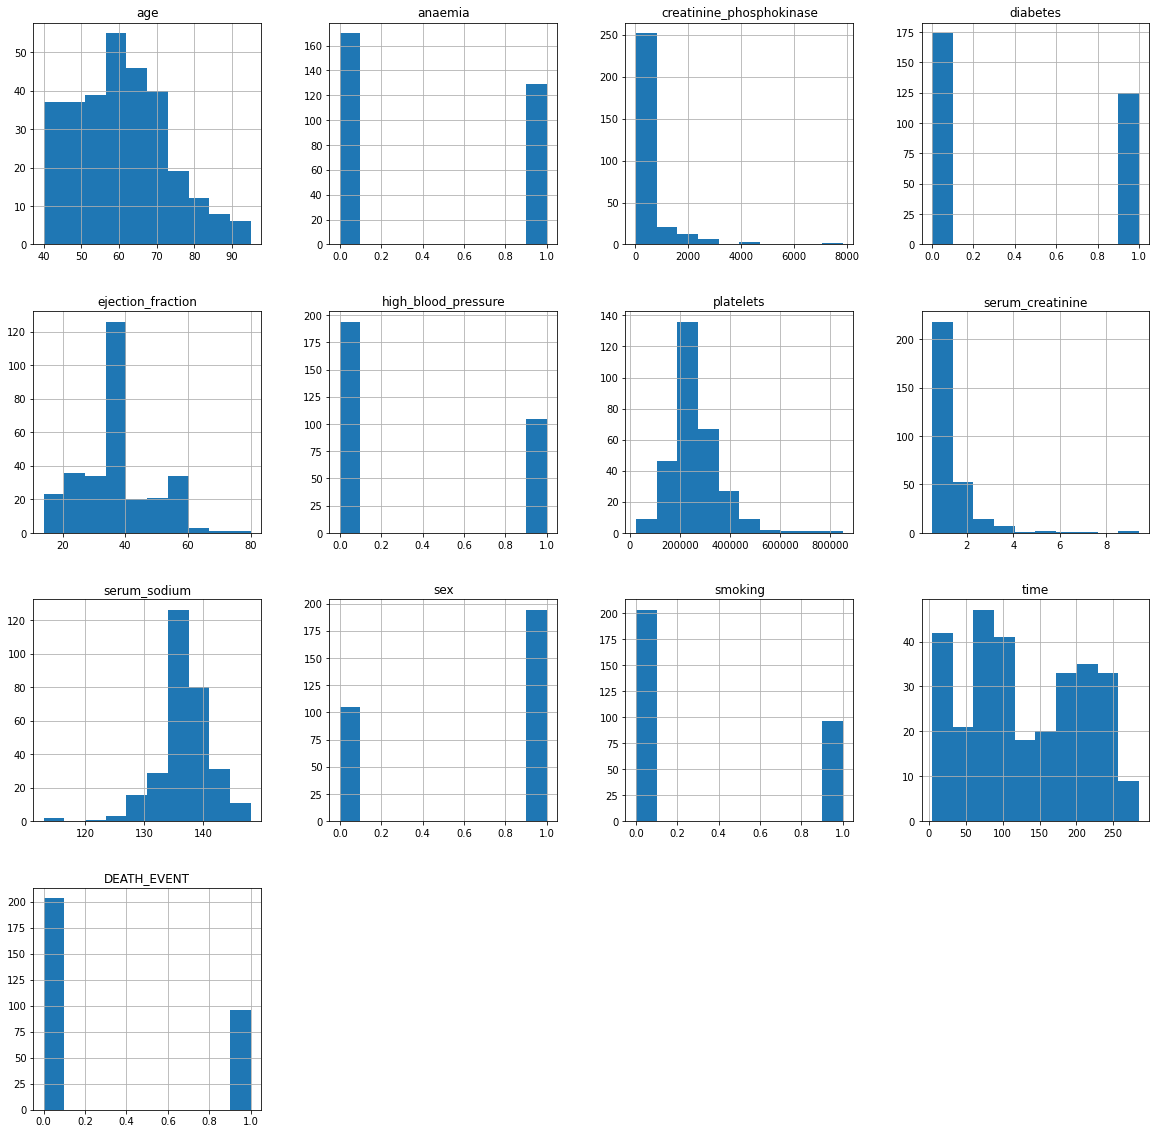

In [14]:
fig=plt.figure(figsize=(20,20))
heart_data.hist(layout=(4,4),sharex=False, ax = fig.gca())
plt.show()


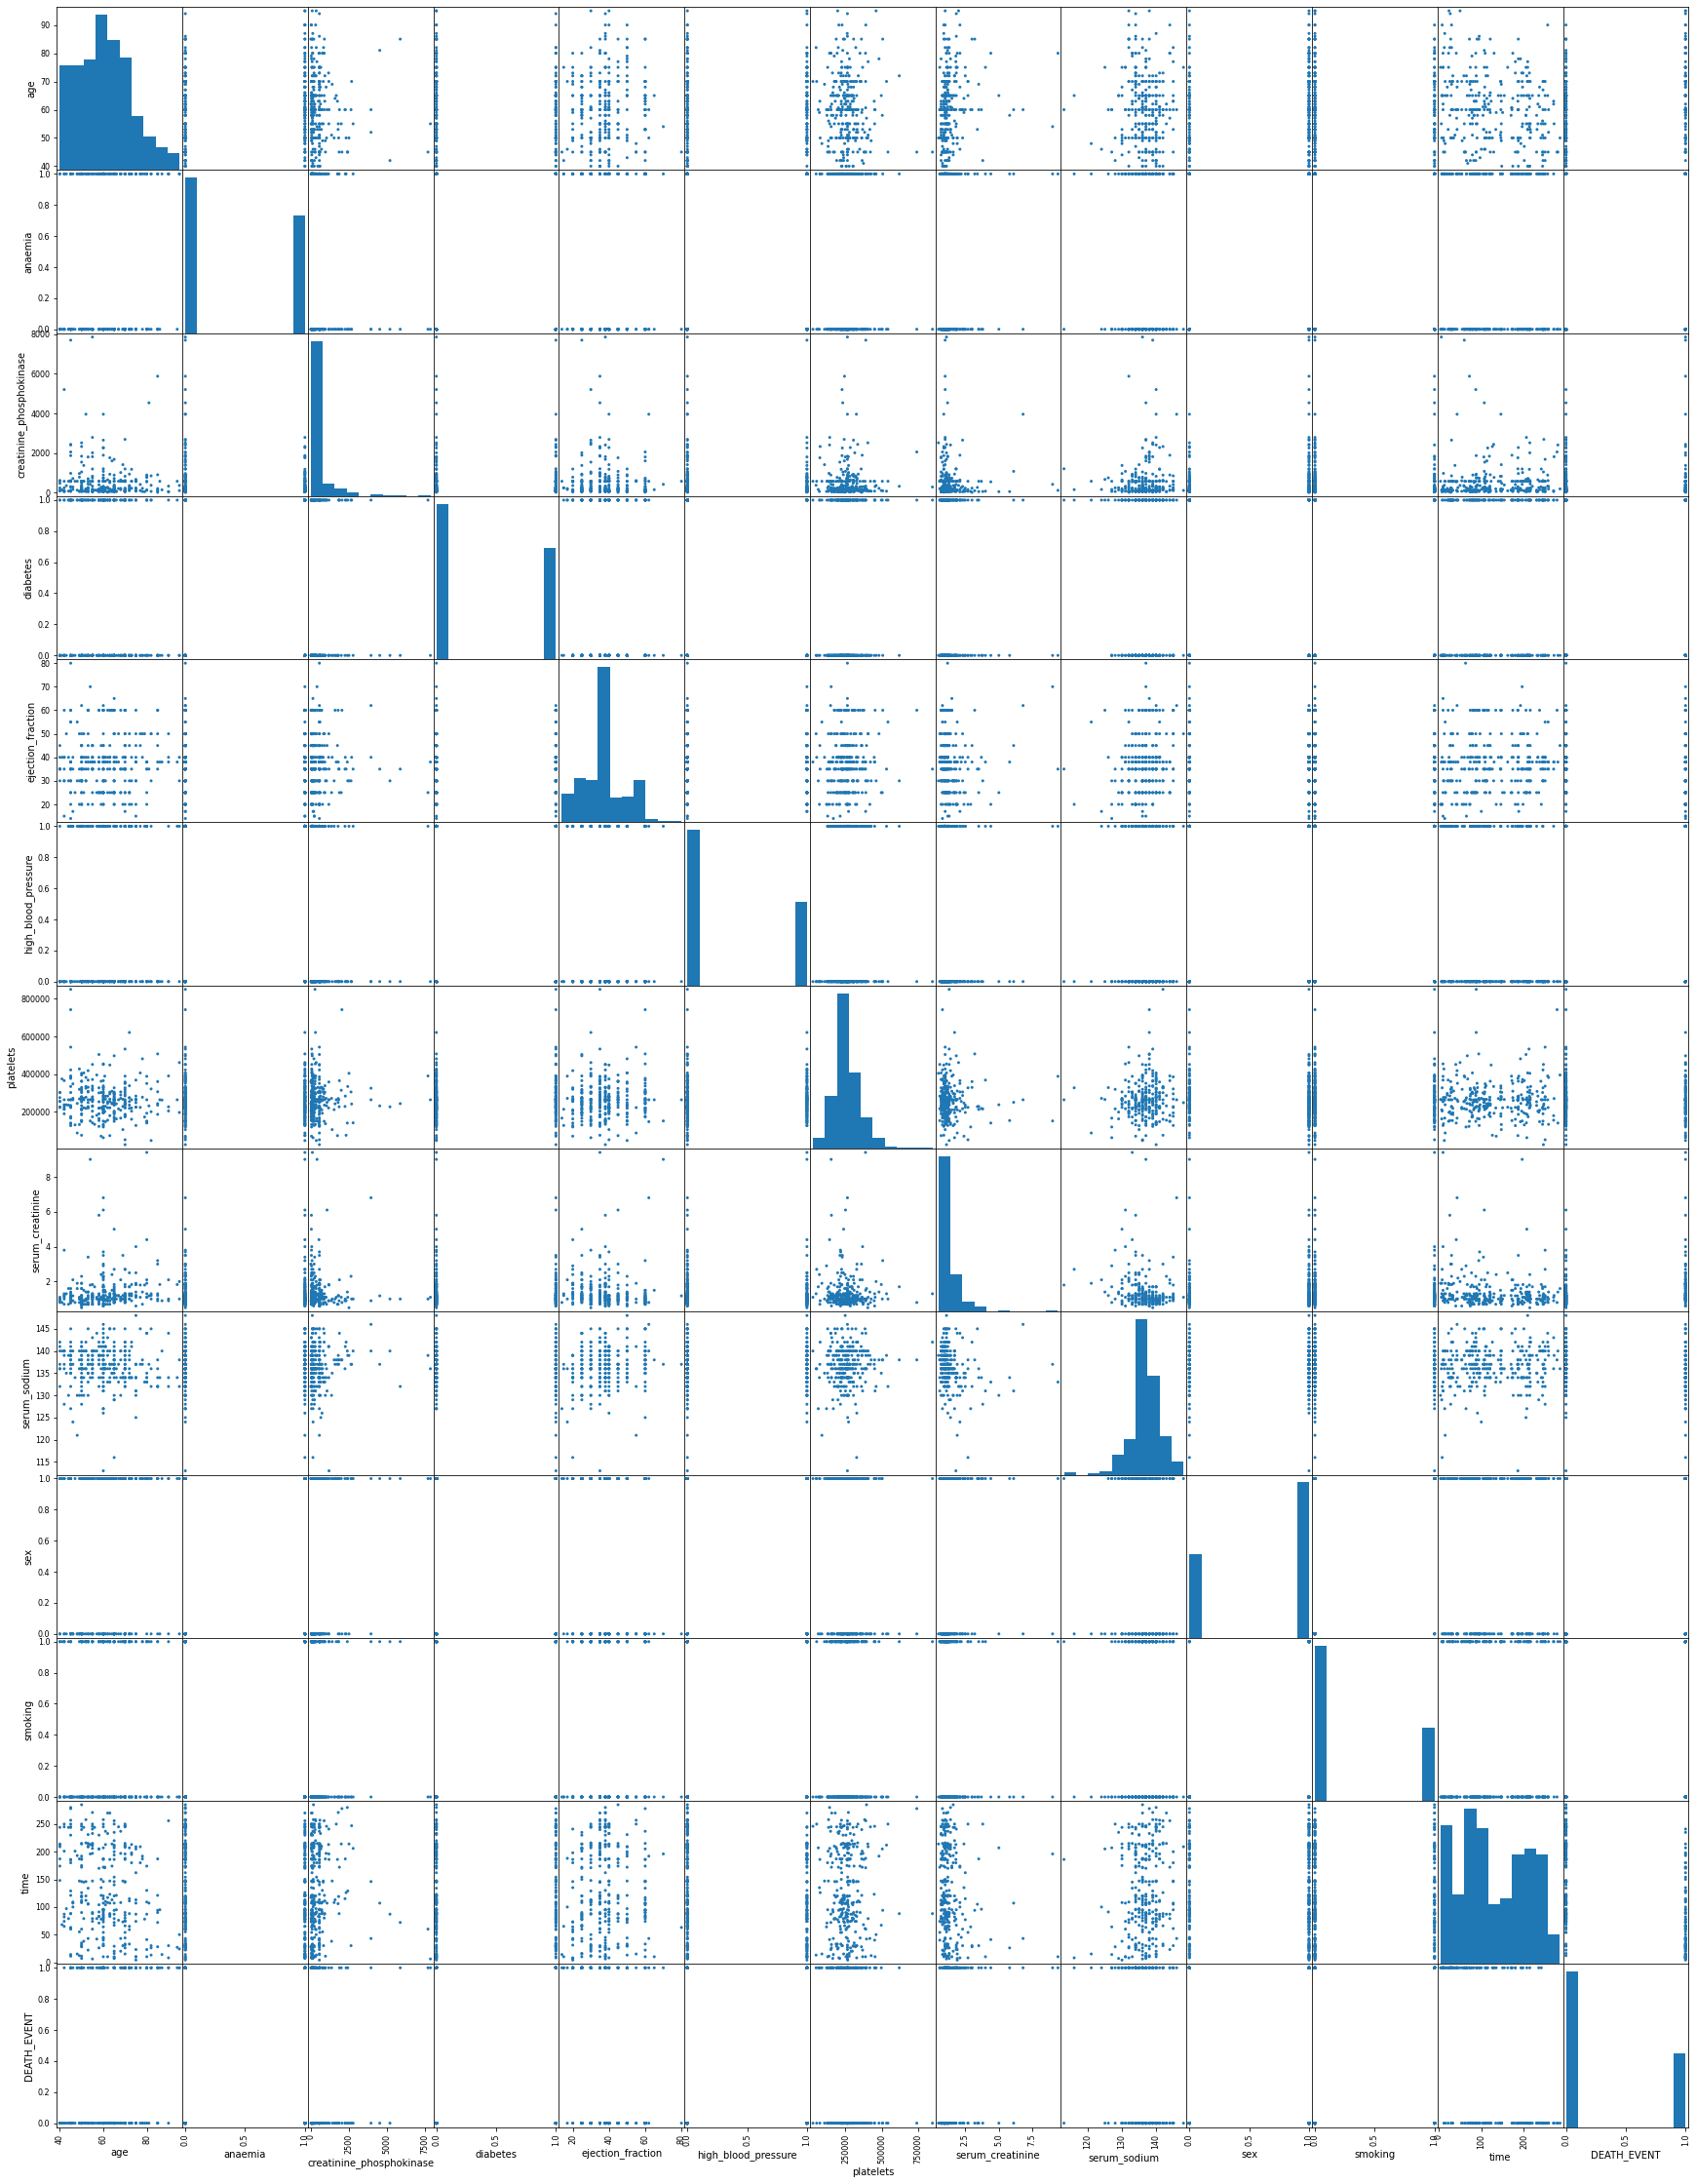

In [15]:
scatter_matrix(heart_data,alpha=1.0,figsize=(30,40))
plt.show()




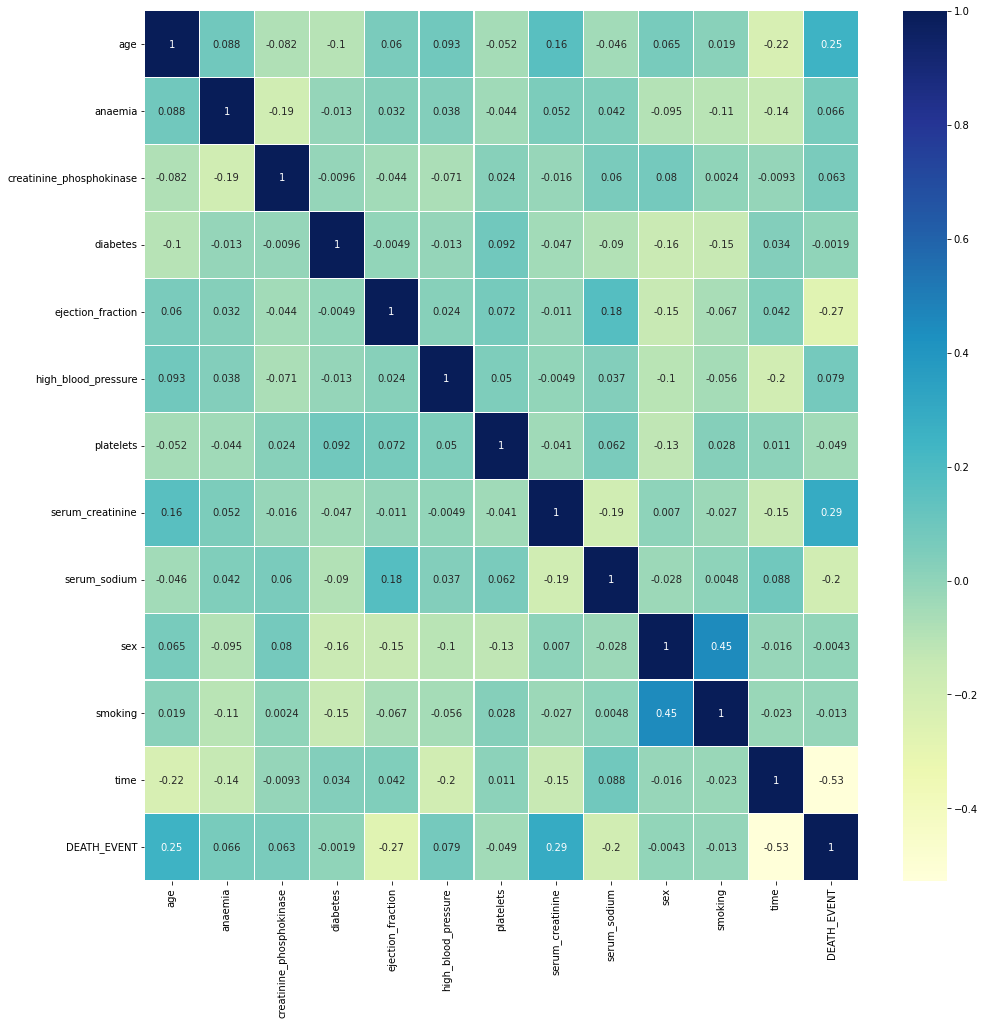

In [16]:
plt.figure(figsize=(16,16))
sns.heatmap(heart_data.corr(),linewidths=0.1,annot=True,cmap='YlGnBu')
plt.show()


In [17]:
array = heart_data.values
X = array[:, :12]
Y = array[:, 12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
print(X.shape,X_train.shape,X_validation.shape)

(299, 12) (239, 12) (60, 12)


In [19]:
model=GaussianNB()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)

93.33333333333333
45 1 3 11
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        46
         1.0       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



In [20]:
model=LogisticRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)

86.66666666666667
42 4 4 10
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        46
         1.0       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)

63.33333333333333
37 9 13 1
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        46
         1.0       0.10      0.07      0.08        14

    accuracy                           0.63        60
   macro avg       0.42      0.44      0.43        60
weighted avg       0.59      0.63      0.61        60



In [22]:
model = SVC()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)

76.66666666666667
46 0 14 0
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        46
         1.0       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)

76.66666666666667
35 11 3 11
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83        46
         1.0       0.50      0.79      0.61        14

    accuracy                           0.77        60
   macro avg       0.71      0.77      0.72        60
weighted avg       0.82      0.77      0.78        60



In [25]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)

93.33333333333333
44 2 2 12
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        46
         1.0       0.86      0.86      0.86        14

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60



In [27]:
model=GradientBoostingClassifier()
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
score=accuracy_score(Y_validation,pred)
print(score*100)
confusion_matrix(Y_validation,pred)
tn,fp,fn,tp=confusion_matrix(Y_validation,pred).ravel()
print(tn,fp,fn,tp)
matrix=classification_report(Y_validation,pred)
print(matrix)


81.66666666666667
39 7 4 10
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88        46
         1.0       0.59      0.71      0.65        14

    accuracy                           0.82        60
   macro avg       0.75      0.78      0.76        60
weighted avg       0.83      0.82      0.82        60



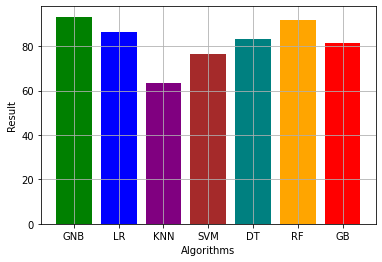

In [28]:
Algorithms = ['GNB',
'LR',
'KNN',
'SVM',
'DT',
'RF',
'GB'
]
Result = [93.3,86.6,63.3,76.6,83.3,91.6,81.6]
Colors = ['green','blue','purple','brown','teal','orange','red']
plt.bar(Algorithms, Result,color=Colors)
plt.xlabel('Algorithms')
plt.ylabel('Result')
plt.grid(True)
plt.show()
